In [1]:
from transformers import BertTokenizer, BertModel
import torch
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE

# Bert Embeddings

In [2]:
model = BertModel.from_pretrained('bert-base-uncased')
model.to('cuda')
model.eval()

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0): BertLayer(
        (attention): BertAttention(
          (self): BertSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False)
          

In [3]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

In [4]:
word_embeddings = model.embeddings.word_embeddings.weight[8000:8050]

In [5]:
tsne = TSNE(n_components=2, perplexity=15, random_state=10)
results = tsne.fit_transform(word_embeddings.cpu().detach().numpy())
words = tokenizer.vocab.keys()

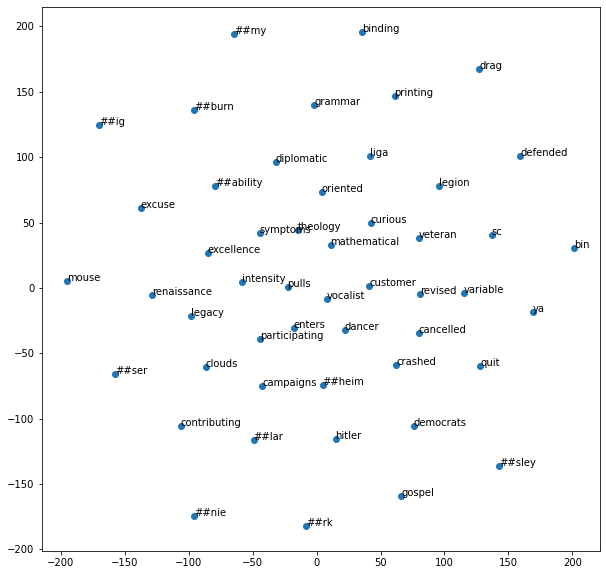

In [6]:
plt.figure(figsize=(10, 10))
plt.scatter(results[:, 0], results[:, 1])
for i, word in enumerate(list(words)[8000:8050]):
    plt.annotate(word, xy=(results[i, 0], results[i, 1]))

In [7]:
# Positional embeddings
position_embedding = model.embeddings.position_embeddings.weight[:128]

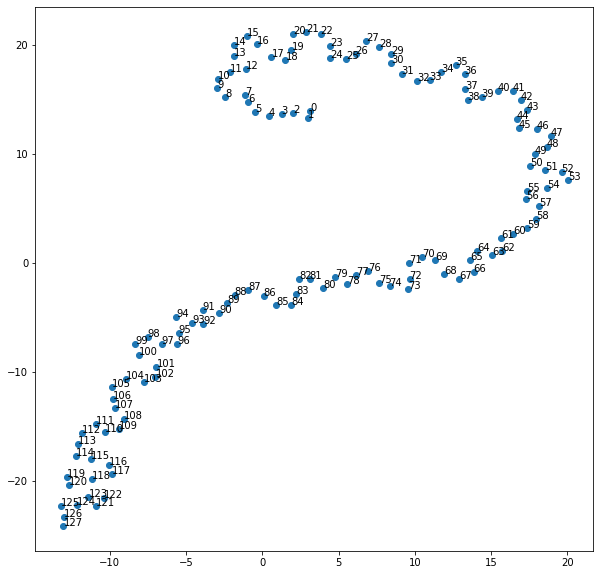

In [8]:
tsne = TSNE(n_components=2, perplexity=15, random_state=10)
results = tsne.fit_transform(position_embedding.cpu().detach().numpy())
words = tokenizer.vocab.keys()

plt.figure(figsize=(10, 10))
plt.scatter(results[:, 0], results[:, 1])
for i, word in enumerate(range(128)):
    plt.annotate(word, xy=(results[i, 0], results[i, 1]))

In [9]:
token_type_embedding = model.embeddings.token_type_embeddings.weight

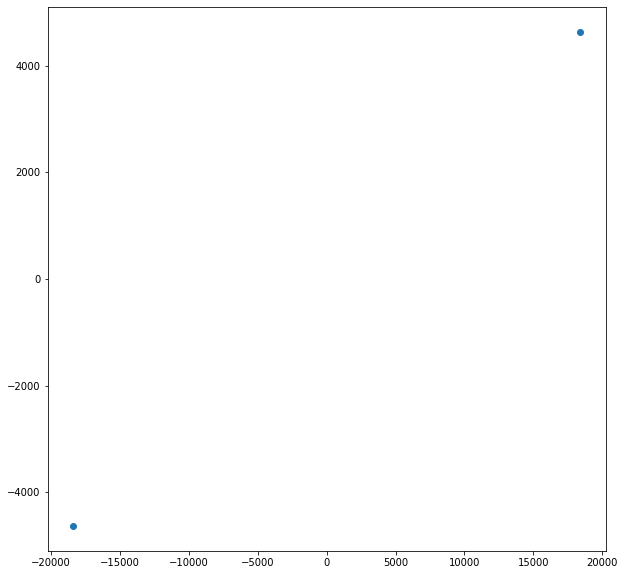

In [10]:
tsne = TSNE(n_components=2, perplexity=15, random_state=10)
results = tsne.fit_transform(token_type_embedding.cpu().detach().numpy())
words = tokenizer.vocab.keys()

plt.figure(figsize=(10, 10))
plt.scatter(results[:, 0], results[:, 1])